# How to Develop Voting Ensembles With Python
https://machinelearningmastery.com/voting-ensembles-with-python/

# Tutorial Overview

# Voting Ensembles

# Voting Ensemble Scikit-Learn API

# Voting Ensemble for Classification

>knn1 0.873 (0.030)
>knn3 0.889 (0.038)
>knn5 0.895 (0.031)
>knn7 0.899 (0.035)
>knn9 0.900 (0.033)
>hard_voting 0.902 (0.034)


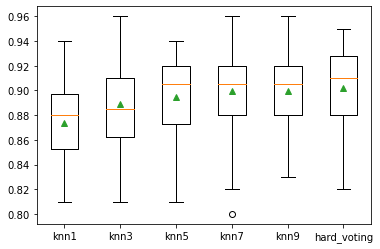

In [2]:

# compare hard voting to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
	return X, y
 
# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
	models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
	models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
	models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
	models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn1'] = KNeighborsClassifier(n_neighbors=1)
	models['knn3'] = KNeighborsClassifier(n_neighbors=3)
	models['knn5'] = KNeighborsClassifier(n_neighbors=5)
	models['knn7'] = KNeighborsClassifier(n_neighbors=7)
	models['knn9'] = KNeighborsClassifier(n_neighbors=9)
	models['hard_voting'] = get_voting()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [3]:
# make a prediction with a hard voting ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
# define the base models
models = list()
models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
# define the hard voting ensemble
ensemble = VotingClassifier(estimators=models, voting='hard')
# fit the model on all available data
ensemble.fit(X, y)
# make a prediction for one example
data = [[5.88891819,2.64867662,-0.42728226,-1.24988856,-0.00822,-3.57895574,2.87938412,-1.55614691,-0.38168784,7.50285659,-1.16710354,-5.02492712,-0.46196105,-0.64539455,-1.71297469,0.25987852,-0.193401,-5.52022952,0.0364453,-1.960039]]
yhat = ensemble.predict(data)
print('Predicted Class: %d' % (yhat))

#Running the example fits the hard voting ensemble model on the entire dataset 
#and is then used to make a prediction on a new row of data, as we might when 
#using the model in an application.

Predicted Class: 1


# Soft Voting Ensemble for Classification

>svm1 0.855 (0.035)
>svm2 0.859 (0.034)
>svm3 0.890 (0.035)
>svm4 0.808 (0.037)
>svm5 0.850 (0.037)
>soft_voting 0.923 (0.026)


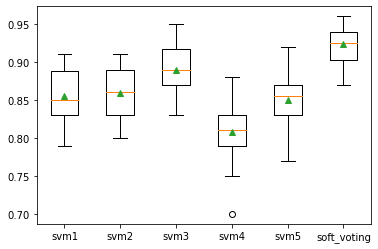

In [4]:

# compare soft voting ensemble to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
	return X, y
 
# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	models.append(('svm1', SVC(probability=True, kernel='poly', degree=1)))
	models.append(('svm2', SVC(probability=True, kernel='poly', degree=2)))
	models.append(('svm3', SVC(probability=True, kernel='poly', degree=3)))
	models.append(('svm4', SVC(probability=True, kernel='poly', degree=4)))
	models.append(('svm5', SVC(probability=True, kernel='poly', degree=5)))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='soft')
	return ensemble
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['svm1'] = SVC(probability=True, kernel='poly', degree=1)
	models['svm2'] = SVC(probability=True, kernel='poly', degree=2)
	models['svm3'] = SVC(probability=True, kernel='poly', degree=3)
	models['svm4'] = SVC(probability=True, kernel='poly', degree=4)
	models['svm5'] = SVC(probability=True, kernel='poly', degree=5)
	models['soft_voting'] = get_voting()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [5]:

# make a prediction with a soft voting ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
# define the base models
models = list()
models.append(('svm1', SVC(probability=True, kernel='poly', degree=1)))
models.append(('svm2', SVC(probability=True, kernel='poly', degree=2)))
models.append(('svm3', SVC(probability=True, kernel='poly', degree=3)))
models.append(('svm4', SVC(probability=True, kernel='poly', degree=4)))
models.append(('svm5', SVC(probability=True, kernel='poly', degree=5)))
# define the soft voting ensemble
ensemble = VotingClassifier(estimators=models, voting='soft')
# fit the model on all available data
ensemble.fit(X, y)
# make a prediction for one example
data = [[5.88891819,2.64867662,-0.42728226,-1.24988856,-0.00822,-3.57895574,2.87938412,-1.55614691,-0.38168784,7.50285659,-1.16710354,-5.02492712,-0.46196105,-0.64539455,-1.71297469,0.25987852,-0.193401,-5.52022952,0.0364453,-1.960039]]
yhat = ensemble.predict(data)
print('Predicted Class: %d' % (yhat))

#Running the example fits the soft voting ensemble model on the entire dataset and is then used to make a 
#prediction on a new row of data, as we might when using the model in an application.

Predicted Class: 1


# Voting Ensemble for Regression

>cart1 -161.519 (11.414)
>cart2 -152.596 (11.271)
>cart3 -142.378 (10.900)
>cart4 -140.086 (12.469)
>cart5 -137.403 (12.389)
>voting -136.392 (11.272)


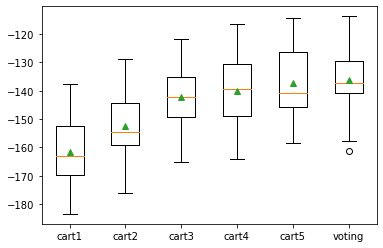

In [6]:

# compare voting ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
	return X, y
 
# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	models.append(('cart1', DecisionTreeRegressor(max_depth=1)))
	models.append(('cart2', DecisionTreeRegressor(max_depth=2)))
	models.append(('cart3', DecisionTreeRegressor(max_depth=3)))
	models.append(('cart4', DecisionTreeRegressor(max_depth=4)))
	models.append(('cart5', DecisionTreeRegressor(max_depth=5)))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	return ensemble
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['cart1'] = DecisionTreeRegressor(max_depth=1)
	models['cart2'] = DecisionTreeRegressor(max_depth=2)
	models['cart3'] = DecisionTreeRegressor(max_depth=3)
	models['cart4'] = DecisionTreeRegressor(max_depth=4)
	models['cart5'] = DecisionTreeRegressor(max_depth=5)
	models['voting'] = get_voting()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [7]:

# make a prediction with a voting ensemble
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
# define the base models
models = list()
models.append(('cart1', DecisionTreeRegressor(max_depth=1)))
models.append(('cart2', DecisionTreeRegressor(max_depth=2)))
models.append(('cart3', DecisionTreeRegressor(max_depth=3)))
models.append(('cart4', DecisionTreeRegressor(max_depth=4)))
models.append(('cart5', DecisionTreeRegressor(max_depth=5)))
# define the voting ensemble
ensemble = VotingRegressor(estimators=models)
# fit the model on all available data
ensemble.fit(X, y)
# make a prediction for one example
data = [[0.59332206,-0.56637507,1.34808718,-0.57054047,-0.72480487,1.05648449,0.77744852,0.07361796,0.88398267,2.02843157,1.01902732,0.11227799,0.94218853,0.26741783,0.91458143,-0.72759572,1.08842814,-0.61450942,-0.69387293,1.69169009]]
yhat = ensemble.predict(data)
print('Predicted Value: %.3f' % (yhat))

Predicted Value: 141.319
